In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score



from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

# Visualisation

In [2]:
df = pd.read_csv('../datasets/df1.csv')

In [3]:
dfbase = pd.read_csv('../datasets/train.csv')

In [4]:
# resale price on y-aaxis in thousands 
df['resale_price'] = df['resale_price'] / 1000

In [5]:
df['Tranc_Year'] = dfbase['Tranc_Year']

In [6]:
# for region, flat type, floor area, we only analyse 3, 4, 5 room data 
list_of_flat_types = df['flat_type'].isin(['3 ROOM', '4 ROOM', '5 ROOM'])
df_flat_type = df[list_of_flat_types]

---
Resale price by region

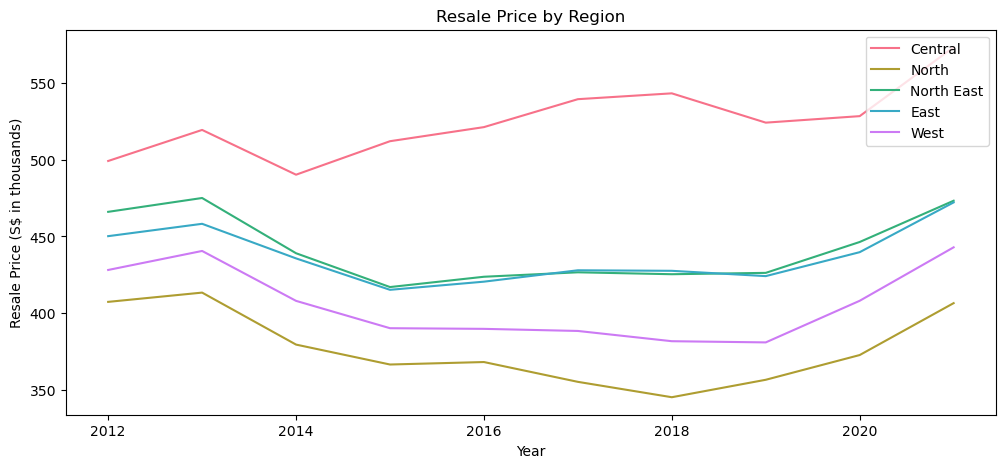

In [7]:
dx = sns.lineplot(data=df_flat_type, x='Tranc_Year', y='resale_price', hue='region', palette='husl', errorbar=None)
plt.legend(title=None, labels=['Central', 'North', 'North East', 'East', 'West'], loc='upper right')
dx.figure.set_size_inches(12,5)
dx.set(xlabel='Year', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Region');

Analysis: resale price is on a general upward trend, except for 2 notable periods:

1. 2013 Cooling Measures: introduced Additional Buyer Stamp Duty for Singaporeans and PRs for their second and first property respectively
2. 2018 Cooling Measures

Price range is visibly different based on the region.


---
Resale Price by Flat Type

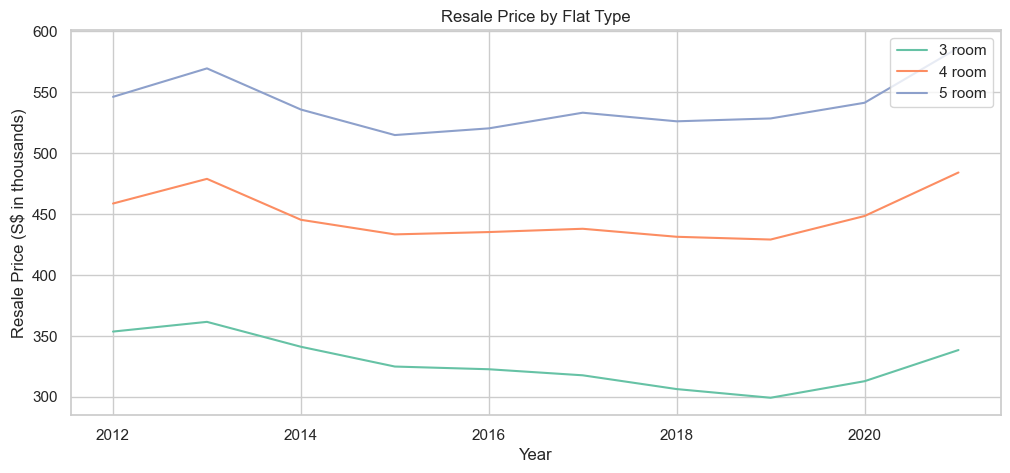

In [8]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
dx = sns.lineplot(data=df_flat_type, x='Tranc_Year', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], errorbar=None)
plt.legend(title=None, labels=['3 room', '4 room', '5 room'], loc='upper right')
dx.figure.set_size_inches(12,5)
dx.set(xlabel='Year', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Flat Type');

Analysis: price trend follows a very similar fashion as region


---
Resale Price by Floor Area

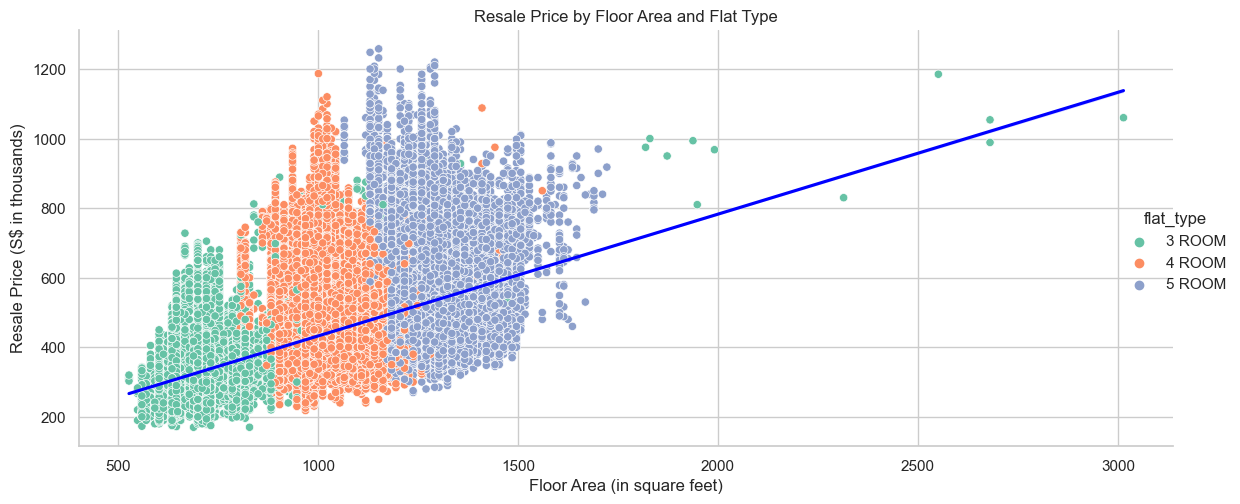

In [9]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
# Create scatter plot using sns.relplot
ax = sns.relplot(data=df_flat_type, x='floor_area_sqft', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], aspect=5)
ax.figure.set_size_inches(12, 5)
# Customize legend labels and location
# ax.legend(labels=['3 room', '4 room', '5 room'], loc='lower right')
# Add regression plot using sns.regplot
sns.regplot(data=df_flat_type, x='floor_area_sqft', y='resale_price', scatter=False, fit_reg=True, color='blue')
# Set axis labels and title
ax.set(xlabel='Floor Area (in square feet)', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Floor Area and Flat Type')
# Show the plot
plt.show()

Analysis: general upward trend corroborates well with above analysis, even for the few data points on the top right hand corner 

---
Resale Price by Age

[Text(0.5, 0, 'HDB Age (in years)'),
 Text(0, 0.5, 'Resale Price (S$ in thousands)'),
 Text(0.5, 1.0, 'Resale Price by HDB Age')]

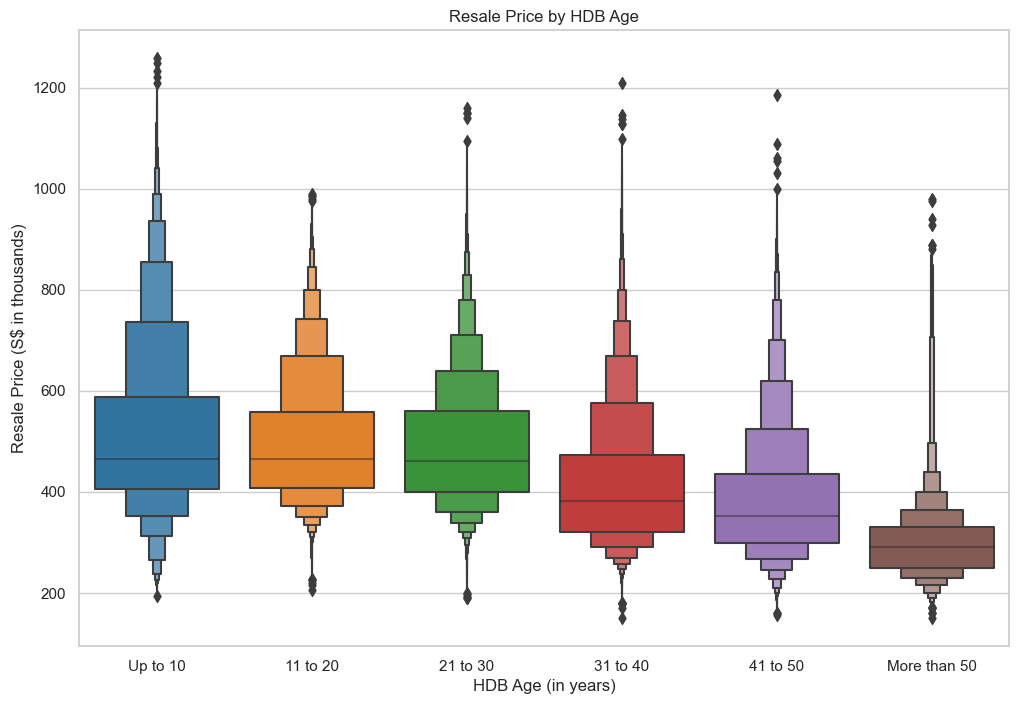

In [10]:
df['hdb_age_bin']=pd.cut(x=df['hdb_age'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['Up to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', 'More than 50'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='hdb_age_bin', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='HDB Age (in years)', ylabel='Resale Price (S$ in thousands)', title='Resale Price by HDB Age')

Analysis: general downwrds trend for resale price as the hdb age increases 

---
Resale Price by Storey Level

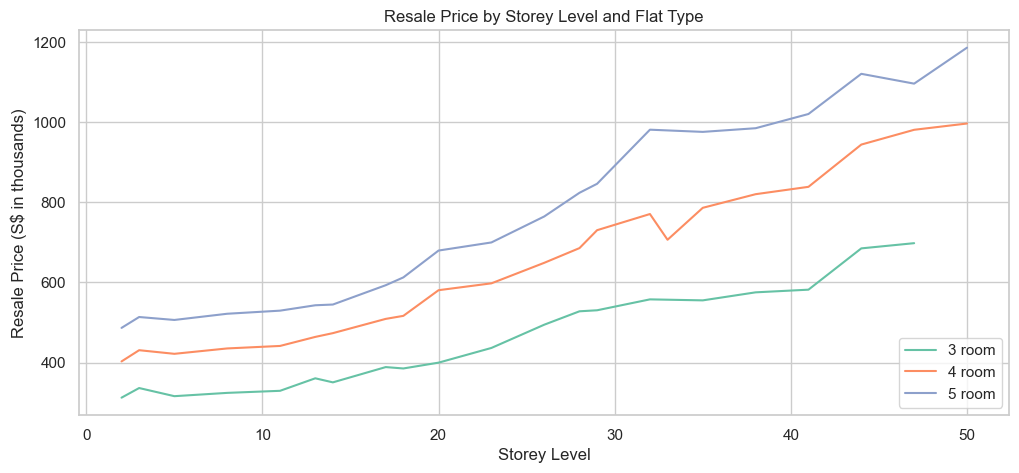

In [11]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
# Create scatter plot using sns.relplot
ax = sns.lineplot(data=df_flat_type, x='mid_storey', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], legend=None, errorbar=None)
ax.figure.set_size_inches(12, 5)
# Customize legend labels and location
ax.legend(labels=['3 room', '4 room', '5 room'], loc='lower right')
# Set axis labels and title
ax.set(xlabel='Storey Level', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Storey Level and Flat Type')
# Show the plot
plt.show()

Analysis: the higher the storey level of the unit, the higher price it can fetch


---
Resale Price by Mall Proximity 

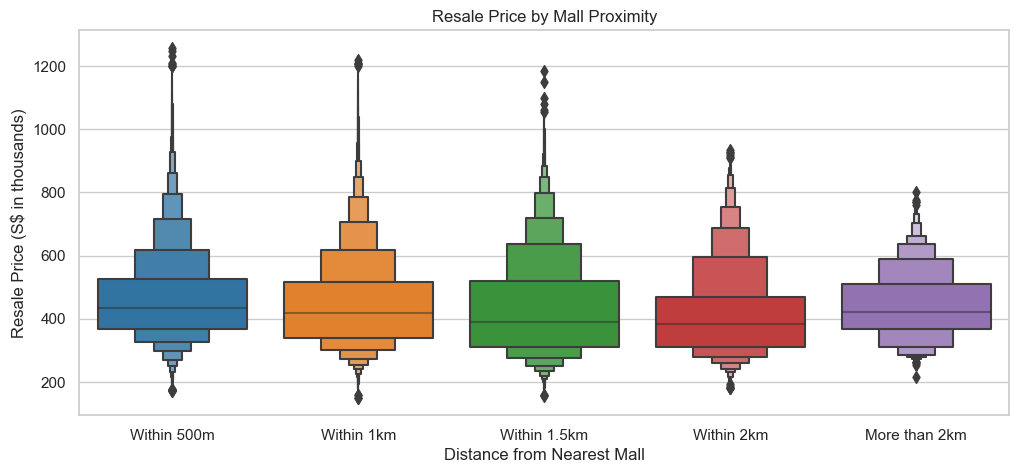

In [12]:
df['mall_dist_bins'] = pd.cut(x=df['Mall_Nearest_Distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', 'Within 1km', 'Within 1.5km', 'Within 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='mall_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,5)
cx.set(xlabel='Distance from Nearest Mall', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Mall Proximity');

Analysis: malls within 1.5km proximity see a wider price range


---
Resale Price by Hawker Proximity

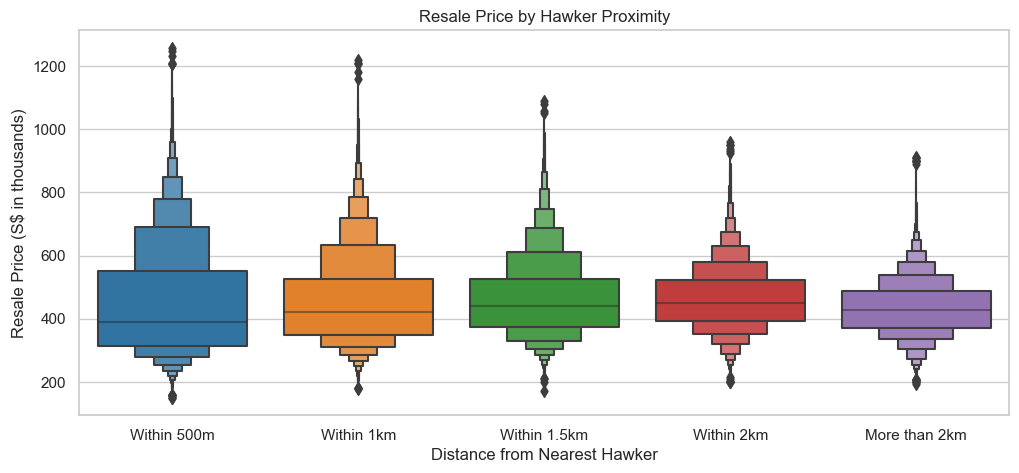

In [13]:

df['hawker_dist_bins'] = pd.cut(x=df['Hawker_Nearest_Distance'], bins=[0, 500, 1000, 1500, 2000, 5000], labels=['Within 500m', 'Within 1km', 'Within 1.5km', 'Within 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='hawker_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,5)
cx.set(xlabel='Distance from Nearest Hawker', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Hawker Proximity');

Analysis: 75% of transacted units have a wide range of price for proximity of 500m


---
Resale Price by MRT Proximity

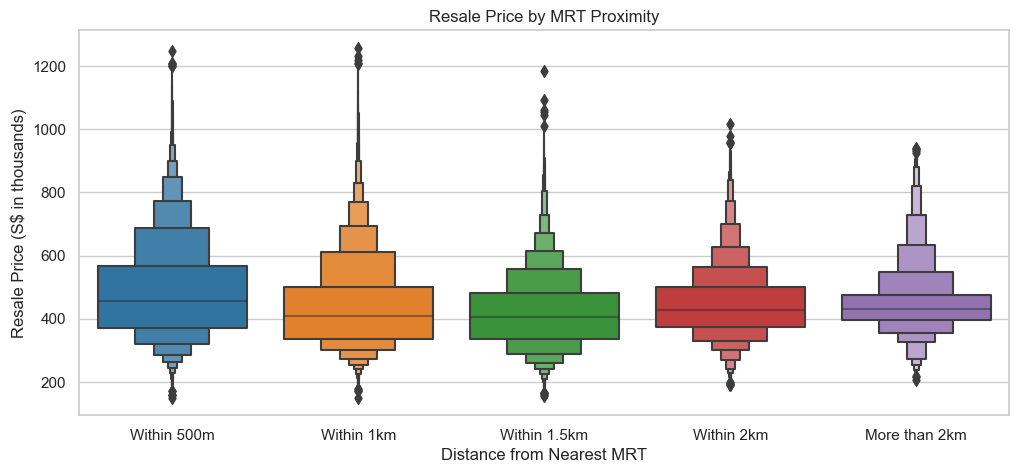

In [14]:
df['mrt_dist_bins'] = pd.cut(x=df['mrt_nearest_distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', 'Within 1km', 'Within 1.5km', 'Within 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='mrt_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,5)
cx.set(xlabel='Distance from Nearest MRT', ylabel='Resale Price (S$ in thousands)', title='Resale Price by MRT Proximity');

Analysis: a wide range of pricing for proximity of 1.5km. Buyers are willing to pay for proximity to MRT


---
Resale Price by Primary School

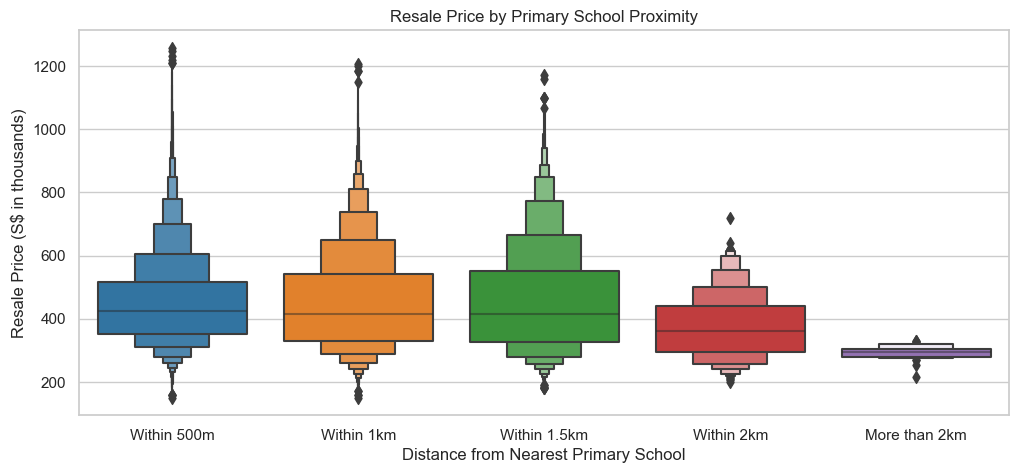

In [15]:
df['pri_sch_nearest_distance'] = dfbase['pri_sch_nearest_distance']
df['pri_sch_bins'] = pd.cut(x=df['pri_sch_nearest_distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', 'Within 1km', 'Within 1.5km', 'Within 2km', 'More than 2km'])
#hdb_train['resale_price'] = hdb_train['resale_price'] / 1000
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='pri_sch_bins', y='resale_price')
cx.figure.set_size_inches(12,5)
cx.set(xlabel='Distance from Nearest Primary School', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Primary School Proximity');

Analysis: a wide range of pricing for proximity of 1.5km. Buyers are willing to pay for proximity to Pri Sch.
